# Create map of parcel data

In [1]:
# set up
import os
import geopandas
import matplotlib.pyplot as plt
import numpy as np

os.chdir("../data/")

In [2]:
# load data
parcels = geopandas.read_file('Parcels_FY19')

## Look at data

In [3]:
parcels.head()

,OBJECTID,Map,Block,Lot,MBL,PolyType,AddNum,Street,AddNum2,Street2,AddNum3,Street3,SublotOf,TaxParMBL,Shape_Leng,Shape_Area,geometry
0,1,19,F,1,19-F-1,PARCEL,838,BROADWAY,None,None,None,None,None,19-F-1,2133.460536,197502.465873,"(POLYGON ((759940.058133468 2971010.939469054,..."
1,2,54,D,5,54-D-5,PARCEL,393,WASHINGTON ST,None,None,None,None,None,54-D-5,316.130596,2397.402540,(POLYGON ((762784.5485074669 2963229.330360398...
2,3,85,A,14,85-A-14,PARCEL,0,ASSEMBLY ROW,None,None,None,None,None,85-A-14,9542.340855,207970.565472,"POLYGON ((769452.9154200554 2969581.503351554,..."
3,4,94,C,6,94-C-6,PARCEL,10,POPLAR ST,None,None,None,None,None,94-C-6,1492.376498,83911.819744,"POLYGON ((767606.6182596385 2962997.970258817,..."
4,5,117,A,2,117-A-2,PARCEL,0,INNER BELT RD,None,None,None,None,None,117-A-2,4249.883150,239816.278490,(POLYGON ((771386.5998728871 2961124.379845887...


In [4]:
parcels.columns

Index(['OBJECTID', 'Map', 'Block', 'Lot', 'MBL', 'PolyType', 'AddNum',
       'Street', 'AddNum2', 'Street2', 'AddNum3', 'Street3', 'SublotOf',
       'TaxParMBL', 'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')

In [5]:
for col in ['Map', 'Block', 'Lot']:
    print("\n\n" + col)
    print(round(parcels[col].value_counts(normalize=True)*100, 4))



Map
7      2.2305
27     2.0594
29     2.0167
28     1.9597
90     1.8171
        ...  
114    0.0214
100    0.0143
84     0.0143
86     0.0143
98     0.0071
Name: Map, Length: 117, dtype: float64


Block
A    17.4031
C    16.2272
B    15.0798
D    13.2982
E    11.6591
F     7.5399
G     6.4852
H     5.1810
I     3.2283
J     1.6890
K     1.3327
L     0.6984
M     0.1782
Name: Block, dtype: float64


Lot
1      4.6477
2      4.3550
3      4.2336
4      4.1693
5      4.0837
        ...  
26B    0.0071
27B    0.0071
12B    0.0071
29B    0.0071
19B    0.0071
Name: Lot, Length: 167, dtype: float64


## Exploratory maps

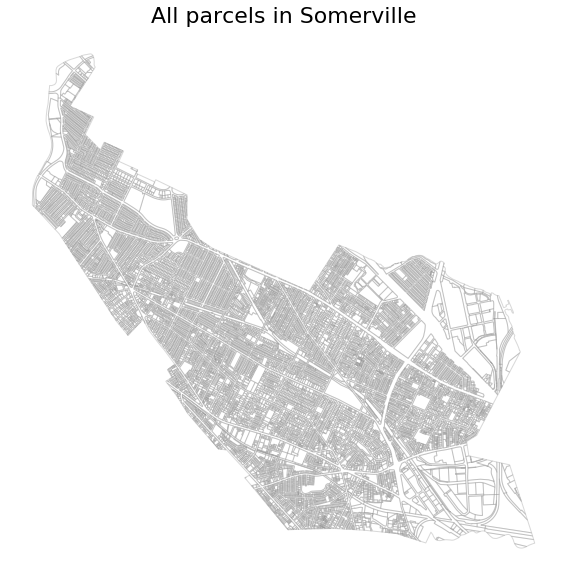

In [6]:
fig, ax = plt.subplots(figsize=(20,10))
parcels.plot(ax=ax, color='white', edgecolor='grey', alpha=0.3)
plt.title("All parcels in Somerville", fontsize=22)
plt.axis('off');

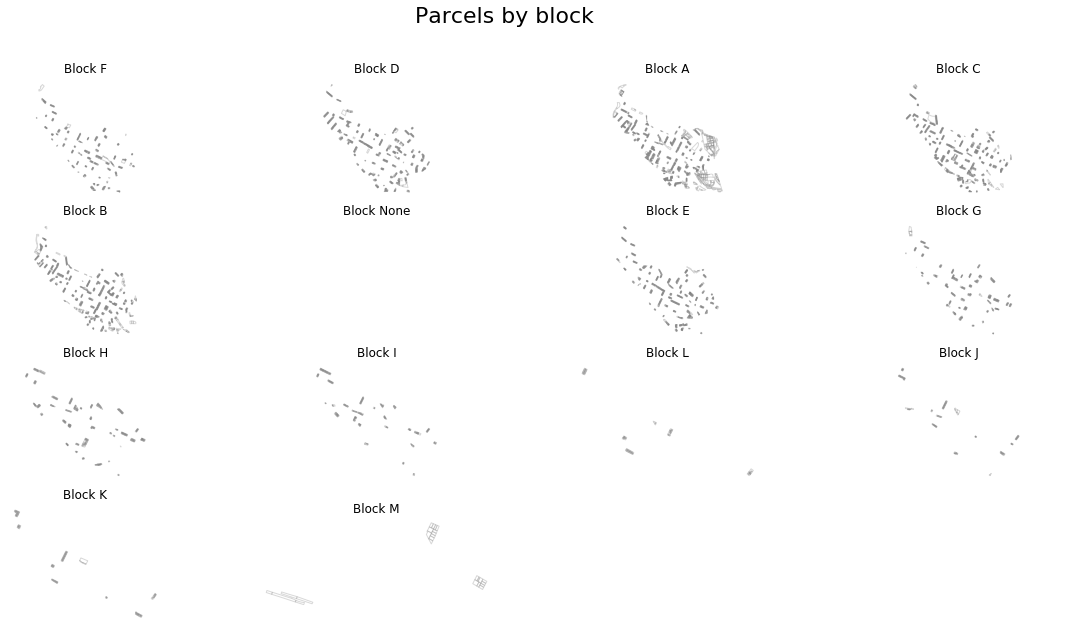

In [8]:
COLUMNS = 4
fig, ax = plt.subplots(nrows=int(np.ceil(parcels['Block'].nunique()/COLUMNS)), ncols=COLUMNS, figsize=(20,10))

row_counter = -1
for i, block in enumerate(parcels['Block'].unique()):
    
    if block != "None":
        
        if i % COLUMNS == 0:
            row_counter += 1
            cur_ax = ax[row_counter, i % COLUMNS]
        else:
            cur_ax = ax[row_counter, i % COLUMNS]
        
        parcels[parcels['Block']==block].plot(ax=cur_ax, color='white', edgecolor='grey', alpha=0.3)
        cur_ax.set_title(f"Block {block}")

[axi.set_axis_off() for axi in ax.ravel()] # remove axes
plt.suptitle("Parcels by block", fontsize=22);